In [4]:
cd ..

/home/jovyan/Capstone/Github_my_version


In [86]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame as DF
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from sklearn.decomposition import PCA
from lib.plr import PLR, connect_line

In [87]:
df = pd.read_csv("data/sandp500/individual_stocks_5yr_TECHNICALS/AAPL_data.csv")

In [88]:
drop_cols = ['Unnamed: 0', 'Date', 'Name']
df = df.drop(drop_cols, 1)
df = df[61:]

In [89]:
for cols in df:
    display(df.loc[df[cols].isnull()])

,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13
247,66.26,66.30,65.42,65.86,63999838,NaN,0.371193,1.112524,0.027478,0.215998,...,0.610162,0.727837,0.455982,2.308567,0.587822,0.573693,0.5,0.005782,0.001320,0.325979
451,90.57,90.69,88.93,89.81,92337903,NaN,0.447241,1.419453,0.030613,0.465119,...,0.695369,0.761842,0.688062,2.272921,0.519735,0.598647,0.5,0.005654,0.003579,0.481784
1018,105.80,106.50,105.50,106.00,24863945,NaN,0.395323,1.259234,0.028913,0.153716,...,0.066062,0.234702,0.773932,1.187653,0.485962,0.520236,0.5,-0.001995,0.002880,0.249162


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


,Open,High,Low,Close,Volume,Acc/Dist_ROC_1,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,...,RSI_6,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13


In [90]:
# Acc/Dist_ROC_1 has random null values. WIll drop this column for initial PCA
df = df.drop('Acc/Dist_ROC_1', 1)

In [91]:
pca = PCA(n_components=1)
pca.fit(df)
X_pca = pca.transform(df)
print("original shape:   ", df.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1197, 46)
transformed shape: (1197, 1)


In [92]:
X = df.as_matrix()

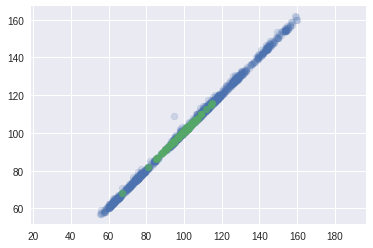

In [93]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

### Higher Dimensionality

In [94]:
X.data.shape

(1197, 46)

In [95]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X.data)
print(X.data.shape)
print(projected.shape)

(1197, 46)
(1197, 2)


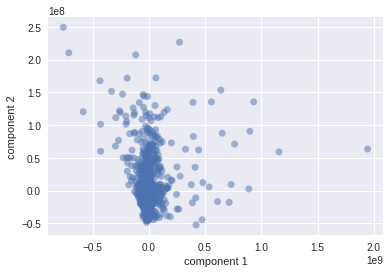

In [96]:
plt.scatter(projected[:, 0], projected[:, 1], edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')